In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df["Na_to_K"]
# tento stlpec odkazuje na pomer sodika k drasliku v ludskom tele 
# (odporucany je 1:3, teda prijem draslika by mal byt 3x vacsi)

0      25.355
1      13.093
2      10.114
3       7.798
4      18.043
        ...  
195    11.567
196    12.006
197     9.894
198    14.020
199    11.349
Name: Na_to_K, Length: 200, dtype: float64

In [4]:
print('Počet prázdnych dát v datasete: ' + str(df.isnull().sum().sum())) # overenie, ci dataframe neobsahuje nejake prazdne zaznamy

Počet prázdnych dát v datasete: 0


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
print(f'''Drugs: {df['Drug'].unique()}, 
Sex: {df['Sex'].unique()}
Blood Pressure: {df['BP'].unique()}
Cholesterol: {df['Cholesterol'].unique()}''')
# vypis hodnot jednotlivych parametrov pre vacis prehlad
# typy liekov: A, B, C, X, Y
# pohlavie: Male, Female
# parameter krvny tlak ma 3 urovne: High, Low, Normal
# cholesterol ma 2 urovne: High, Normal

Drugs: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'], 
Sex: ['F' 'M']
Blood Pressure: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']


# Vizualizácia dát
Rozhodol som sa vizualizovať tento dataframe na základe veku a pomeru sodíka k draslíku (Na_to_K) pre štyri parametre - Pohlavie (Sex), krvný tlak (BP), hladina cholesterolu (Cholesterol) a samotný liek (Drug)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

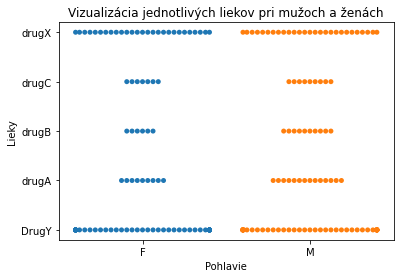

In [8]:
sns.swarmplot(x='Sex', y='Drug', data=df)
plt.xlabel('Pohlavie')
plt.ylabel('Lieky')
plt.title("Vizualizácia jednotlivých liekov pri mužoch a ženách")
plt.show()

Vizualizácia jednotlivých liekov pri mužoch a ženách nevykazuje žiadnu dôležitú odchýlku alebo vzorku. Pohlavie teda nemá vplyv na výber správneho lieku.

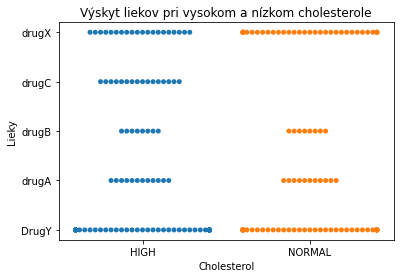

In [9]:
sns.swarmplot(x='Cholesterol', y='Drug', data=df)
plt.xlabel('Cholesterol')
plt.ylabel('Lieky')
plt.title("Výskyt liekov pri vysokom a nízkom cholesterole")
plt.show()

Z tejto vizualizácie je vidieť dva dôležité fakty:

1. Liek C je len pre ľudí, ktorí majú vysoký cholesterol
2. Ostatné lieky môžu byť použité pri všetkých zvyšných prípadoch 

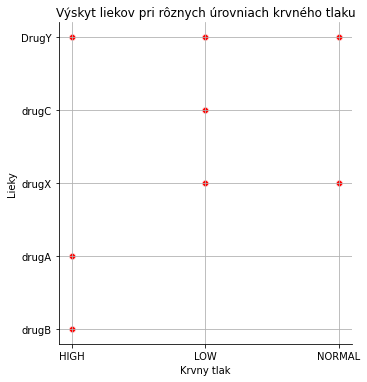

In [10]:
plt.rcParams["figure.figsize"] = (10,3)
sns.relplot(x='BP', y='Drug', data=df, color='red')
plt.xlabel('Krvny tlak')
plt.ylabel('Lieky')
plt.title("Výskyt liekov pri rôznych úrovniach krvného tlaku")
plt.grid()

Podľa tejto vizualizácie môžeme vidieť určitú koreláciu druhov liekov s danou úrovňou cholesterolu:
1. Liek Y je možné použiť pri všetkých úrovniach
2. Liek A a liek B len pri vysokých úrovniach
3. Liek X len pri nízkych úrovniach

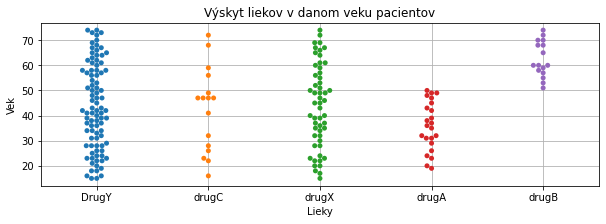

In [11]:
sns.swarmplot(x='Drug',y='Age', data=df)
plt.xlabel('Lieky')
plt.ylabel('Vek')
plt.title("Výskyt liekov v danom veku pacientov")
plt.grid()

Táto vizualizácia mi pomohla pochopiť najmä:

1. Liek B je len pre ľudí starších, ako 50 rokov
2. Liek A je len pre ľudí od 20 - 50 rokov
3. Liek C sa vyskytuje najmenej
4. Liek Y vyzerá byť, ako najbežnejší zo všetkých, môže to byť liek proti chrípke / nachladnutiu

Text(0.5, 1.0, 'Hustota pre hodnotu: pomer sodíka k draslíku')

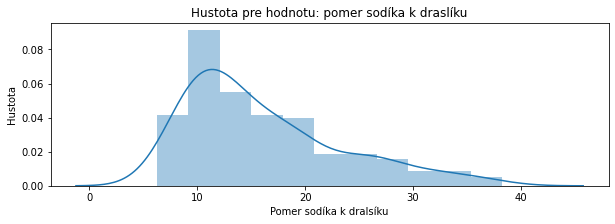

In [12]:
sns.distplot(df['Na_to_K'])
plt.xlabel('Pomer sodíka k dralsíku')
plt.ylabel('Hustota')
plt.title("Hustota pre hodnotu: pomer sodíka k draslíku")

Text(0.5, 1.0, 'Výskyt liekov v dataframe')

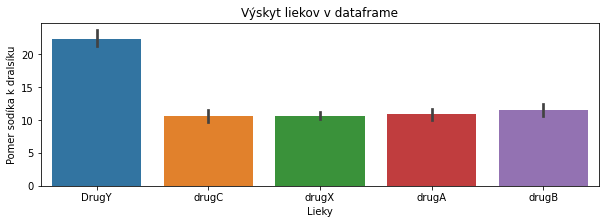

In [13]:
sns.barplot(x = 'Drug', y = 'Na_to_K', data = df)
plt.xlabel('Lieky')
plt.ylabel('Pomer sodíka k dralsíku')
plt.title("Výskyt liekov v dataframe")

Táto vizualizácia porovnáva celkový výskyt jednotlivých liekov

# Predspracovanie dát

In [14]:
# je potrebne este predspracovat kategoricke premenne pohlavie (sex), krvny tlak (BP) a hladinu cholesterolu (Cholesterol)
# funckia get_dummies mi prevedie kategoricku premennu na fiktivne premenne, teda dostanem nove stlpce s nulami
# a jednotkami, dalej mozem pracovat s cislami
dummies = pd.get_dummies(df[['Sex', 'BP', 'Cholesterol']])
dummies.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [15]:
# naslednuje spojenie fiktivneho dataframu dummies s mojim povodnym dataframeom df 
df = pd.concat([df,dummies], axis = 1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,DrugY,1,0,1,0,0,1,0
1,47,M,LOW,HIGH,13.093,drugC,0,1,0,1,0,1,0
2,47,M,LOW,HIGH,10.114,drugC,0,1,0,1,0,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,0,0,1,1,0
4,61,F,LOW,HIGH,18.043,DrugY,1,0,0,1,0,1,0


In [16]:
# ked uz mam prevedene kategoricke premenne na ciselne pre kazdy zaznam, mozem z dataframeu vymazat povodne stlpce
# sex, BP a Cholesterol
df = df.drop(['Sex', 'BP', 'Cholesterol'], axis = 1)
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


In [17]:
df.columns # kontrola, ake vsetky stlpce dataframe obsahuje

Index(['Age', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
       'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

# Train Test Split
Použitie nástroju Train Test Split pre rýchle a efektívne rozdelenie dát do trénovacích a testovacích premnných, ktoré následne použijem pri učení

In [18]:
X = df[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW','BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]
Y = df['Drug']
Y = pd.get_dummies(Y)
# vytvorenie premennej X, co bude predstavovat vstupnu vrstvu pre neuronovu siet, 9 parametrov
# vytvorenie premennej Y, co bude predstavovat vystupnu vrstvu, vytvorim si z nej este
# jednotkovu maticu, teda na vystupe bude 5 parametrov

In [19]:
X.shape, Y.shape # kontrola rozmerov matic

((200, 9), (200, 5))

In [20]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.25, random_state = 42)
# pouzitie train test split pre ucely klasifikacie dat
# do trenovacih premennych si alokujem 75% dat z dataframeu
# do testovacich premennych si alokujem zvysnu 25% dat z dataframe, co urcuje parameter test_size, random_state vybera nahodne hodnoty

In [21]:
for setd,name in zip([X_train,X_test,Y_train,Y_test],['X_train','X_test','Y_train','Y_test']):
  print(name + ' shape : ' + str(setd.shape))
# overenie velkosti test a train matic

X_train shape : (150, 9)
X_test shape : (50, 9)
Y_train shape : (150, 5)
Y_test shape : (50, 5)


# Trénovanie neurónovej siete

Na vytvorenie samotnej neurónovej siete som sa rozhodol použiť Sequental model od Kerasu. Vytvoril som si, ako bude model neurónu vyzerať pomocou vstupnej vrstvy Flatten, dvoch skrytých vrstiev Dense a výstupnej vrstvy Dense. Následne som pripravil model na fitting (trénovanie) pomocou metódy compile s optimizátorom 'adam' a sledujem tu metriku presnosti, teda 'accuracy'.

In [22]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout

In [23]:
model = Sequential([
    # Flatten predstavuje vstupnu vrstvu, je tu 9 neuronov na zaklade datasetu
    Flatten(input_dim=9),
    Dense(32, activation='relu'), # prva skryta vrstva je o velkosti 32 neuronov, aktivacna funkcia relu
    Dropout(0.3), # Dropout zabranuje pretrenovaniu (overfitting) neuronovej siete, 30 % udajov sa nepouzije
    Dense(16, activation='relu'), # druha skryta vrstva o velkosti 16 neuronov, aktivacna funkcia relu
    Dense(5, activation='sigmoid') # vystupna vrstva o velkosti 5 neuronov, aktivacna funkcia sigmoid
])

# na model pouzijem metodu compile, ktora mi ho pripravi na nasledne ucenie (fit), metrics urcuje, co sa bude
# pri vypise zobrazovat, je to samozrejme presnost (accuracy)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary() # vypis modelu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


In [24]:
trening = model.fit(X_train, 
                    Y_train, 
                    batch_size=10, 
                    validation_data=(X_test, Y_test), 
                    epochs=250, 
                    verbose=2)
# batch_size je parameter urcujuci, kolko udajov sa spracovava v jednej iteracii
# verbose je parameter pre vyhlad vypisu, so vsetko bude obsahovat (1 = kompletny) 

Epoch 1/250
15/15 - 1s - loss: 0.1983 - accuracy: 0.4067 - val_loss: 0.1576 - val_accuracy: 0.4000
Epoch 2/250
15/15 - 0s - loss: 0.1796 - accuracy: 0.4333 - val_loss: 0.1527 - val_accuracy: 0.4000
Epoch 3/250
15/15 - 0s - loss: 0.1845 - accuracy: 0.4400 - val_loss: 0.1612 - val_accuracy: 0.4000
Epoch 4/250
15/15 - 0s - loss: 0.1655 - accuracy: 0.4800 - val_loss: 0.1537 - val_accuracy: 0.4000
Epoch 5/250
15/15 - 0s - loss: 0.1638 - accuracy: 0.4533 - val_loss: 0.1523 - val_accuracy: 0.4000
Epoch 6/250
15/15 - 0s - loss: 0.1617 - accuracy: 0.4667 - val_loss: 0.1518 - val_accuracy: 0.4000
Epoch 7/250
15/15 - 0s - loss: 0.1622 - accuracy: 0.4733 - val_loss: 0.1463 - val_accuracy: 0.4000
Epoch 8/250
15/15 - 0s - loss: 0.1552 - accuracy: 0.4867 - val_loss: 0.1517 - val_accuracy: 0.4000
Epoch 9/250
15/15 - 0s - loss: 0.1594 - accuracy: 0.4600 - val_loss: 0.1551 - val_accuracy: 0.4000
Epoch 10/250
15/15 - 0s - loss: 0.1568 - accuracy: 0.4667 - val_loss: 0.1551 - val_accuracy: 0.4000
Epoch 11/

Epoch 84/250
15/15 - 0s - loss: 0.0913 - accuracy: 0.6933 - val_loss: 0.0935 - val_accuracy: 0.6400
Epoch 85/250
15/15 - 0s - loss: 0.0948 - accuracy: 0.6667 - val_loss: 0.0925 - val_accuracy: 0.7200
Epoch 86/250
15/15 - 0s - loss: 0.0942 - accuracy: 0.6733 - val_loss: 0.0922 - val_accuracy: 0.6800
Epoch 87/250
15/15 - 0s - loss: 0.0904 - accuracy: 0.6733 - val_loss: 0.0917 - val_accuracy: 0.6800
Epoch 88/250
15/15 - 0s - loss: 0.0899 - accuracy: 0.6867 - val_loss: 0.0912 - val_accuracy: 0.7200
Epoch 89/250
15/15 - 0s - loss: 0.0882 - accuracy: 0.6933 - val_loss: 0.0913 - val_accuracy: 0.7200
Epoch 90/250
15/15 - 0s - loss: 0.0923 - accuracy: 0.6733 - val_loss: 0.0905 - val_accuracy: 0.7200
Epoch 91/250
15/15 - 0s - loss: 0.0881 - accuracy: 0.6733 - val_loss: 0.0903 - val_accuracy: 0.7200
Epoch 92/250
15/15 - 0s - loss: 0.0847 - accuracy: 0.7067 - val_loss: 0.0882 - val_accuracy: 0.7200
Epoch 93/250
15/15 - 0s - loss: 0.0861 - accuracy: 0.6867 - val_loss: 0.0872 - val_accuracy: 0.7200


Epoch 166/250
15/15 - 0s - loss: 0.0575 - accuracy: 0.7867 - val_loss: 0.0512 - val_accuracy: 0.8000
Epoch 167/250
15/15 - 0s - loss: 0.0561 - accuracy: 0.8000 - val_loss: 0.0494 - val_accuracy: 0.8000
Epoch 168/250
15/15 - 0s - loss: 0.0535 - accuracy: 0.8333 - val_loss: 0.0495 - val_accuracy: 0.8000
Epoch 169/250
15/15 - 0s - loss: 0.0550 - accuracy: 0.7867 - val_loss: 0.0503 - val_accuracy: 0.8000
Epoch 170/250
15/15 - 0s - loss: 0.0539 - accuracy: 0.8200 - val_loss: 0.0478 - val_accuracy: 0.8000
Epoch 171/250
15/15 - 0s - loss: 0.0538 - accuracy: 0.8267 - val_loss: 0.0486 - val_accuracy: 0.8000
Epoch 172/250
15/15 - 0s - loss: 0.0547 - accuracy: 0.7933 - val_loss: 0.0484 - val_accuracy: 0.8000
Epoch 173/250
15/15 - 0s - loss: 0.0532 - accuracy: 0.8133 - val_loss: 0.0472 - val_accuracy: 0.8000
Epoch 174/250
15/15 - 0s - loss: 0.0558 - accuracy: 0.8200 - val_loss: 0.0488 - val_accuracy: 0.8200
Epoch 175/250
15/15 - 0s - loss: 0.0517 - accuracy: 0.8000 - val_loss: 0.0492 - val_accurac

Epoch 248/250
15/15 - 0s - loss: 0.0434 - accuracy: 0.8667 - val_loss: 0.0306 - val_accuracy: 0.9200
Epoch 249/250
15/15 - 0s - loss: 0.0397 - accuracy: 0.8667 - val_loss: 0.0288 - val_accuracy: 0.9000
Epoch 250/250
15/15 - 0s - loss: 0.0387 - accuracy: 0.8867 - val_loss: 0.0286 - val_accuracy: 0.9000


# Vizualizácia výsledkov neurónovej siete

In [25]:
print(trening.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


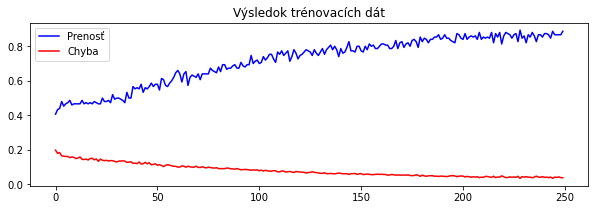

In [26]:
plt.plot(trening.history['accuracy'], label='Prenosť', color='blue')
plt.plot(trening.history['loss'], label='Chyba', color='red')
plt.title('Výsledok trénovacích dát')
plt.legend()
plt.show()

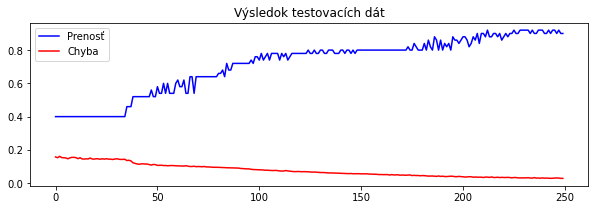

In [27]:
plt.plot(trening.history['val_accuracy'], label='Prenosť', color='blue')
plt.plot(trening.history['val_loss'], label='Chyba', color='red')
plt.title('Výsledok testovacích dát')
plt.legend()
plt.show()

# Výsledok

- Neurónová sieť mala veľmi vysokú 86 % prenosť a nízku chybovosť, ktorá sa každou epochou blížila k nule.
- Dáta nebolo náročné spracovať, jedine bolo nutné rozdeliť kategorické premenné na ďalšie stĺpce